# Hands-on Introduction to 
# Quantum Computing with Qiskit

- **Huang Junye**
- Quantum Developer Advocate
- IBM Quantum & Qiskit community team
- *July 1, 2020*

# Outline
- IBM Quantum Experience & Qiskit
- Basic concepts in quantum computing
    - Superposition
    - Measurement
    - Entanglement
    - Quantum gates
    - Interference
- Algorithm
    - Grover's algorithm

# IBM Quantum Experience

On May 4th 2016, IBM put the first quantum computer on the cloud for anyone to use. 



<table><tr>
<td> <img src="figures/ibm_quantum_experience.png" alt="IBM Quantum Experience" style="width: 1800px;"/> </td>
<td>
We now have:
    <ul>
        <li>200,000+ users</li>
        <li>180+ billions circuits</li>
        <li>18 quantum systems online</li>
        <li>100+ IBM Q Network client partners</li>
        <li>200+ research publications</li>
    </ul>
</td>
</tr></table>



# Qiskit
![Qiskit elements](figures/qiskit_elements.png)

# Basic concepts in Quantum Computing

- Superposition
- Measurement
- Entanglement
- Quantum gates
- Interference

## Superposition
Superposition is creating a quantum state that is a combination of $|0\rangle$ and $|1\rangle$: 

$$|\psi\rangle = a|0\rangle+b|1\rangle$$

<img src="figures/Schrodingers_cat.svg" alt="Schrodinger's cat" style="width: 1200px;"/>

### Import Qiskit

In [1]:
from qiskit import QuantumCircuit, execute # for creating and executing quantum circuits
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_histogram # for visualization
%config InlineBackend.figure_format = 'svg' # make images look nice
import qiskit.tools.jupyter # handy jupyter notebook tools
%qiskit_version_table # display versions of qiskit and its elements

### Create a quantum circuit

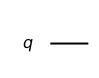

In [2]:
qc0 = QuantumCircuit(1) # create a quantum circuit with 1 qubit
qc0.draw('mpl') # visualize the circuit 

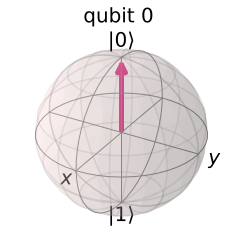

In [3]:
from qiskit.providers.aer import StatevectorSimulator 
# StatevectorSimulator returns final quantum statevector of the circuit

state0 = execute(qc0, StatevectorSimulator()).result().get_statevector() # execute simulation
plot_bloch_multivector(state0) # visualize statevector in a bloch sphere
#plot_state_qsphere(state0) # visualize statevector in a qsphere

### Add quantum gates

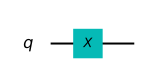

In [4]:
qc1 = QuantumCircuit(1)
qc1.x(0) # apply X gate to qubit 0
qc1.draw('mpl')

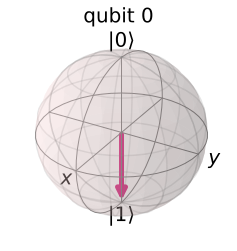

In [5]:
state1 = execute(qc1, StatevectorSimulator()).result().get_statevector()
plot_bloch_multivector(state1)
#plot_state_qsphere(state1)

### Create superposition

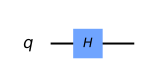

In [6]:
qc2 = QuantumCircuit(1)
qc2.h(0) # apply Hadamard gate to qubit 0
qc2.draw('mpl')

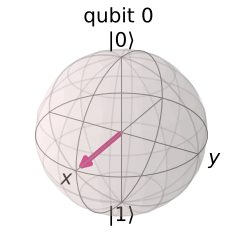

In [7]:
state2 = execute(qc2, StatevectorSimulator()).result().get_statevector()
plot_bloch_multivector(state2)
#plot_state_qsphere(state2)

## Measurement
Measurement is an action that forces a qubit to either $|0\rangle$ or $|1\rangle$ based on probability. 

For state $|\psi\rangle = a|0\rangle+b|1\rangle$:

- $|a|^2$ is the probability we will get $|0\rangle$ when we measure
- $|b|^2$ is the probability we will get $|1\rangle$ when we measure

![Schrodinger cat measurement](figures/schrodingers_cat_measurement.png)

### Add measurement operation

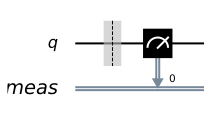

In [8]:
qc0.measure_all() # measure all qubits and store the result in classical bits
qc0.draw('mpl')

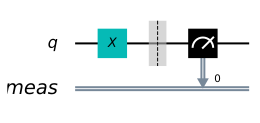

In [9]:
qc1.measure_all()
qc1.draw('mpl')

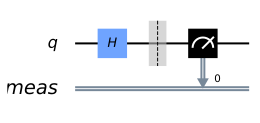

In [10]:
qc2.measure_all()
qc2.draw('mpl')

### Measurement statistics

In [11]:
from qiskit.providers.aer import QasmSimulator # QasmSimulator micmic beheaviour of real devices

# real devices require multiple execution (shots, default=1024) to obtain outcome statistics
counts0 = execute(qc0, QasmSimulator(), shots=1000).result().get_counts()
counts1 = execute(qc1, QasmSimulator(), shots=1000).result().get_counts()
counts2 = execute(qc2, QasmSimulator(), shots=1000).result().get_counts()
print(counts0, counts1, counts2) 

{'0': 1000} {'1': 1000} {'0': 516, '1': 484}


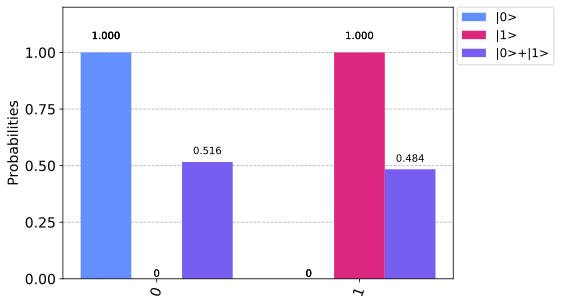

In [12]:
plot_histogram([counts0, counts1, counts2], legend=['|0>','|1>','|0>+|1>']) # visualize outcome statistics

## Entanglement
Entanglement strongly connects two or more qubits so that their quantum states are no longer independent.

<center><img src="figures/quantum_entanglement.jpg" alt="Quantum entanglement" style="width: 1000px;"/></center>

### Hadamard with 2 qubits

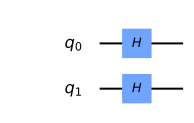

In [13]:
qc3 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc3.h(0)
qc3.h(1)
qc3.draw('mpl')

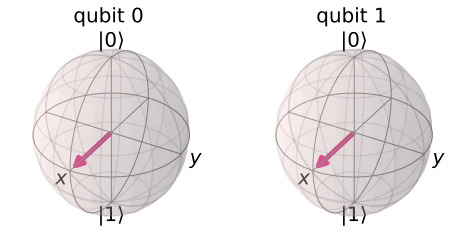

In [14]:
state3 = execute(qc3, StatevectorSimulator()).result().get_statevector()
plot_bloch_multivector(state3)
#plot_state_qsphere(state3)

### Bell state $|\phi\rangle = 1 / \sqrt{2}(|00\rangle + |11\rangle)$ 

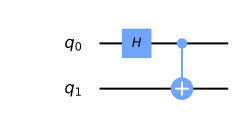

In [15]:
qc4 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc4.h(0)
qc4.cx(0,1) # apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc4.draw('mpl')

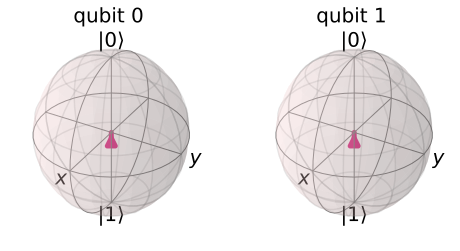

In [16]:
state4 = execute(qc4, StatevectorSimulator()).result().get_statevector()
plot_bloch_multivector(state4)
#plot_state_qsphere(state4)

### Measurement statistics for Bell state

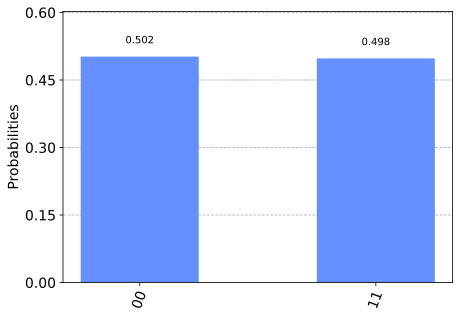

In [17]:
qc4.measure_all()
counts4 = execute(qc4, QasmSimulator()).result().get_counts()
plot_histogram(counts4)

## Quantum gates
Quantum gates perform the basic computational operations on qubits (think of as counterparts to classical and, +, and so on).

![Quantum gates](figures/quantum_gates.png)

- [Quantum instruction glossary](https://quantum-computing.ibm.com/docs/circ-comp/q-gates)
- [Circuit Composer (IBM Quantum Experience)](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Interferenece
Interference allows us to increase the probability of getting the right answer and decrease the chance of getting the wrong one.

<center><img src='figures/doubleslit.svg'></center>

## Grover's algorithm: unstructured search problem
Search for an item $w$ in an unstructured database with $N$ items.

Example: search for the owner of a phone number on yellow pages.

- Classical algorithm: $O(N)$ queries
- Quantum algorithm: $O(\sqrt N)$ queries

<center><img src='figures/unstructured_search.png'></center>

## Grover's algorithm: Step 1
**Step 1: Create a uniform superposition state $|s\rangle=H^{\otimes n}|0\rangle^n$.**

Example: $n=2$, $N = 2^n = 4$
- $|w\rangle = |10\rangle$
- $|s\rangle = sin(\theta)(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$
- $|s'\rangle = sin(\theta)(|00\rangle + |01\rangle + |11\rangle)$
- $sin(\theta) = \frac{1}{\sqrt N} = \frac{1}{2}, \theta = 30^{\circ} $

![Grover step1](figures/grover_step1.png)



## Grover's algorithm: Step 2
**Step 2: Apply oracle reflection  $U_f$ to flip the sign of winner state.**

Example: $U_f|s\rangle = sin(\theta)(|00\rangle + |01\rangle - |10\rangle + |11\rangle)$

![Grover step2](figures/grover_step2.png)

## Grover's algorithm: Step 3
**Step 3: Apply an additional reflection  $U_s$  about the state  $|s\rangle:  U_s=2|s\rangle \langle s | - \mathbb{1}$.**

Example: $U_s U_f|s\rangle = sin(3\theta)|10\rangle + \sqrt{(1-sin^2 (3\theta))/3} (|00\rangle + |01\rangle + |11\rangle) = |10\rangle$

![Grover step3](figures/grover_step3.png)

## Grover's algorithm: Step 4

**Step 4: Repeat Step 2 and 3 for $O(\sqrt N)$ times**

![Grover's algorithm](figures/grover_algorithm.png)

The probability of getting $|w\rangle$ after t steps: $sin^2 ((2t+1)\theta)$

After $O(\sqrt N)$ times, the probability is close to 100%.

- for $n=2$, needs only 1 iteration
- for $n=3$, needs 2 iterations

## Circuit Composer Demo
- [Grover's algorithm 2-qubit, 1 iteration](https://quantum-computing.ibm.com/composer/b26c3fff8c5b0e3d25c52a787564bb0f)
- [Grover's algorithm 3-qubit, 2 iterations](https://quantum-computing.ibm.com/composer/3cf2c268c828e4316ccd9988745539d9)

## Qiskit Code Demo

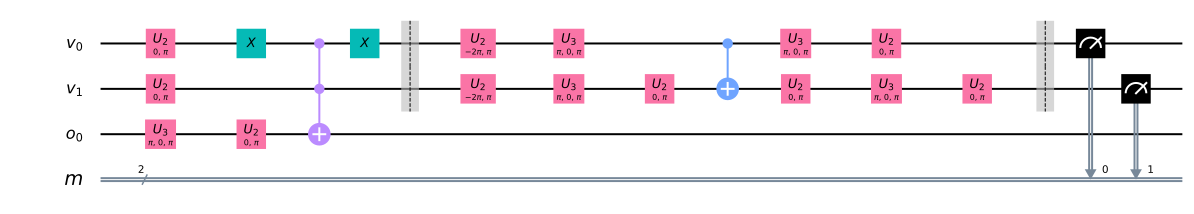

In [18]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle 
from qiskit.providers.basicaer import QasmSimulatorPy

oracle = TruthTableOracle('0010') # implement oracle using truth table
grover = Grover(oracle, num_iterations=1) # initialize Grover's algorithm with oracle and number of iterations
grover.set_backend(QasmSimulatorPy()) # set backend for running the algorithm
result = grover.run() # run Grover's algorithm
plot_histogram(result['measurement'])
grover.construct_circuit(measurement=True).draw('mpl') # visualize the grover circuit

## Porfolio optimization using Grover's algorithm
- [A. Gilliam, S. Woerner, C. Gonciulea, Grover Adaptive Search for Constrained Polynomial Binary Optimization, arXiv preprint arXiv:1912.04088 (2019).](https://arxiv.org/abs/1912.04088)
- [Grover Optimizer tutorial](https://qiskit.org/documentation/tutorials/optimization/4_grover_optimizer.html)

<center><img src="figures/gas-algorithm.png" width=800></center>

## Quantum Computing for Finance
- [IBM Institute for Business Value](https://www.ibm.com/thought-leadership/institute-business-value/report/exploring-quantum-financial)
- [Quantum computing for Finance: state of the art and future prospects](https://arxiv.org/abs/2006.14510), IBM Quantum, arXiv:2006.14510

## Qiskit Global Summer School

A 2-week intensive summer school designed to empower the next generation of quantum developers with the knowledge to explore quantum applications on their own. 

- Date: July 20-31
- [Curriculum](https://qiskit.org/events/summer-school/)
- [Apply here](https://www.eventbrite.com/e/qiskit-global-summer-school-tickets-110201256926)

## Qiskit education resources
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Coding with Qiskit series](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [1 Minute Qiskit](https://www.youtube.com/watch?v=GuppGy50dQ4&list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)
- [Qiskit Live: Circuit Sessions](https://www.youtube.com/watch?v=Omv-bPvQ3E8&list=PLOFEBzvs-VvrRlVz7wqaqmaMZj_ZK2Afe)
- [Qiskit Live: Seminar Series](https://www.youtube.com/watch?v=iKgysY097Ok&list=PLOFEBzvs-Vvr0uEoGFo08n4-WrM_8fft2)


## Qiskit community
- [Qiskit Twitter](https://twitter.com/qiskit)
- [Qiskit Slack](http://ibm.co/joinqiskitslack)

### Coding with Qiskit

In [19]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/a1NZC5rqQD8", width=1200, height=675)

### 1 Minute Qiskit

In [20]:
IFrame(src="https://www.youtube.com/embed/GuppGy50dQ4", width=1200, height=675)

### Qiskit Live: Circuit Sessions

In [21]:
IFrame(src="https://www.youtube.com/embed/Omv-bPvQ3E8", width=1200, height=675)

### Qiskit Live: Seminar Series

In [22]:
IFrame(src="https://www.youtube.com/embed/iKgysY097Ok", width=1200, height=675)